In [1737]:
___Author___='LumberJack Jyss'

In [1738]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [1739]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import talib
from zigzag import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
print('Librairies imported')

Importing librairies...
Librairies imported


In [1740]:
import warnings
warnings.filterwarnings("ignore")

In [1741]:
start = '2017-02-16'
end = '2019-05-28'

In [1742]:
vix = pd.read_csv('vix_5Y.csv')
index_pc = pd.read_csv('indexpc 2014_2019.csv',delimiter=';')
header = index_pc.iloc[1]
index_pc = index_pc.iloc[2:,:]
index_pc = index_pc.rename(columns = header)
index_pc.reset_index(inplace=True,drop=True)
vix = vix.iloc[:-1,1:-1]

In [1743]:
index_pc.tail()

DATE    CALL      PUT    TOTAL P/C Ratio
1251  05/21/2019  793567  1156224  1949791      1.46
1252  05/22/2019  838707   862131  1700838      1.03
1253  05/23/2019  825548  1199985  2025533      1.45
1254  05/24/2019  809790   804403  1614193      0.99
1255  05/28/2019  661477   878284  1539761      1.33

In [1744]:
df = pd.read_csv('spx_5Y.csv')
df = df.iloc[1:,1:-1]

In [1745]:
vix.shape,df.shape,index_pc.shape

((1256, 5), (1256, 5), (1256, 5))

In [1746]:
df.head()

Date     Open     High      Low    Close
1  20140602  1923.87  1925.88  1915.98  1924.97
2  20140603  1923.07  1925.07  1918.79  1924.24
3  20140604  1923.06  1928.63  1918.60  1927.88
4  20140605  1928.52  1941.74  1922.93  1940.46
5  20140606  1942.41  1949.44  1942.41  1949.44

In [1747]:
vix.head()

Date   Open   High    Low  Close
0  20140602  11.69  12.17  11.29  11.58
1  20140603  12.03  12.13  11.72  11.87
2  20140604  12.15  12.33  11.91  12.08
3  20140605  12.09  12.34  11.44  11.68
4  20140606  11.32  11.39  10.73  10.73

In [1748]:
for i in range(0,vix.shape[0]-1):
    if vix.iloc[i,0]!= df.iloc[i,0]:
        print('Vix :', vix.iloc[i,0],' spy : ', df.iloc[i,0])
        print('Index Vix:', vix.index[i],' index GBP/USD :',df.index[i])
        #df = df.drop([i],axis=0)
vix.reset_index(inplace=True,drop=True)
df.reset_index(inplace=True,drop=True)

In [1749]:
vix.shape,df.shape

((1256, 5), (1256, 5))

In [1750]:
vix.tail()

Date   Open   High    Low  Close
1251  20190521  15.86  16.22  14.79  14.95
1252  20190522  15.06  15.44  14.42  14.75
1253  20190523  15.93  18.05  15.28  16.92
1254  20190524  16.34  16.52  15.52  15.85
1255  20190528  16.55  17.70  15.90  17.50

In [1751]:
df.tail()

Date     Open     High      Low    Close
1251  20190521  2854.02  2868.88  2854.02  2864.36
1252  20190522  2856.06  2865.47  2851.11  2856.27
1253  20190523  2836.70  2836.70  2805.49  2822.24
1254  20190524  2832.41  2841.36  2820.19  2826.06
1255  20190528  2830.03  2840.51  2802.06  2802.39

In [1752]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  1256
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1005  jours 
Bloc 2 : 251  jours


In [1753]:
dataset_1D = df.copy()
dataset_1D['Vix'] = vix['Close']
dataset_1D['P/C Ratio'] = index_pc['P/C Ratio']
dataset_1D.head()

Date     Open     High      Low    Close    Vix P/C Ratio
0  20140602  1923.87  1925.88  1915.98  1924.97  11.58      1.17
1  20140603  1923.07  1925.07  1918.79  1924.24  11.87      1.38
2  20140604  1923.06  1928.63  1918.60  1927.88  12.08      0.74
3  20140605  1928.52  1941.74  1922.93  1940.46  11.68      0.73
4  20140606  1942.41  1949.44  1942.41  1949.44  10.73      1.04

In [1754]:
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio
1251  20190521  2854.02  2868.88  2854.02  2864.36  14.95      1.46
1252  20190522  2856.06  2865.47  2851.11  2856.27  14.75      1.03
1253  20190523  2836.70  2836.70  2805.49  2822.24  16.92      1.45
1254  20190524  2832.41  2841.36  2820.19  2826.06  15.85      0.99
1255  20190528  2830.03  2840.51  2802.06  2802.39  17.50      1.33

In [1755]:
rsi = talib.RSI(dataset_1D['Close'],timeperiod=14)
upper, middle, lower =  talib.BBANDS(dataset_1D['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(dataset_1D['Close'],timeperiod=5)
sma8 = talib.SMA(dataset_1D['Close'],timeperiod=8)
sma10 = talib.SMA(dataset_1D['Close'],timeperiod=10)
sma12 = talib.SMA(dataset_1D['Close'],timeperiod=12)
sma15 = talib.SMA(dataset_1D['Close'],timeperiod=15)
sma30 = talib.SMA(dataset_1D['Close'],timeperiod=30)
sma35 = talib.SMA(dataset_1D['Close'],timeperiod=35)
sma40 = talib.SMA(dataset_1D['Close'],timeperiod=40)
sma45 = talib.SMA(dataset_1D['Close'],timeperiod=45)
sma50 = talib.SMA(dataset_1D['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

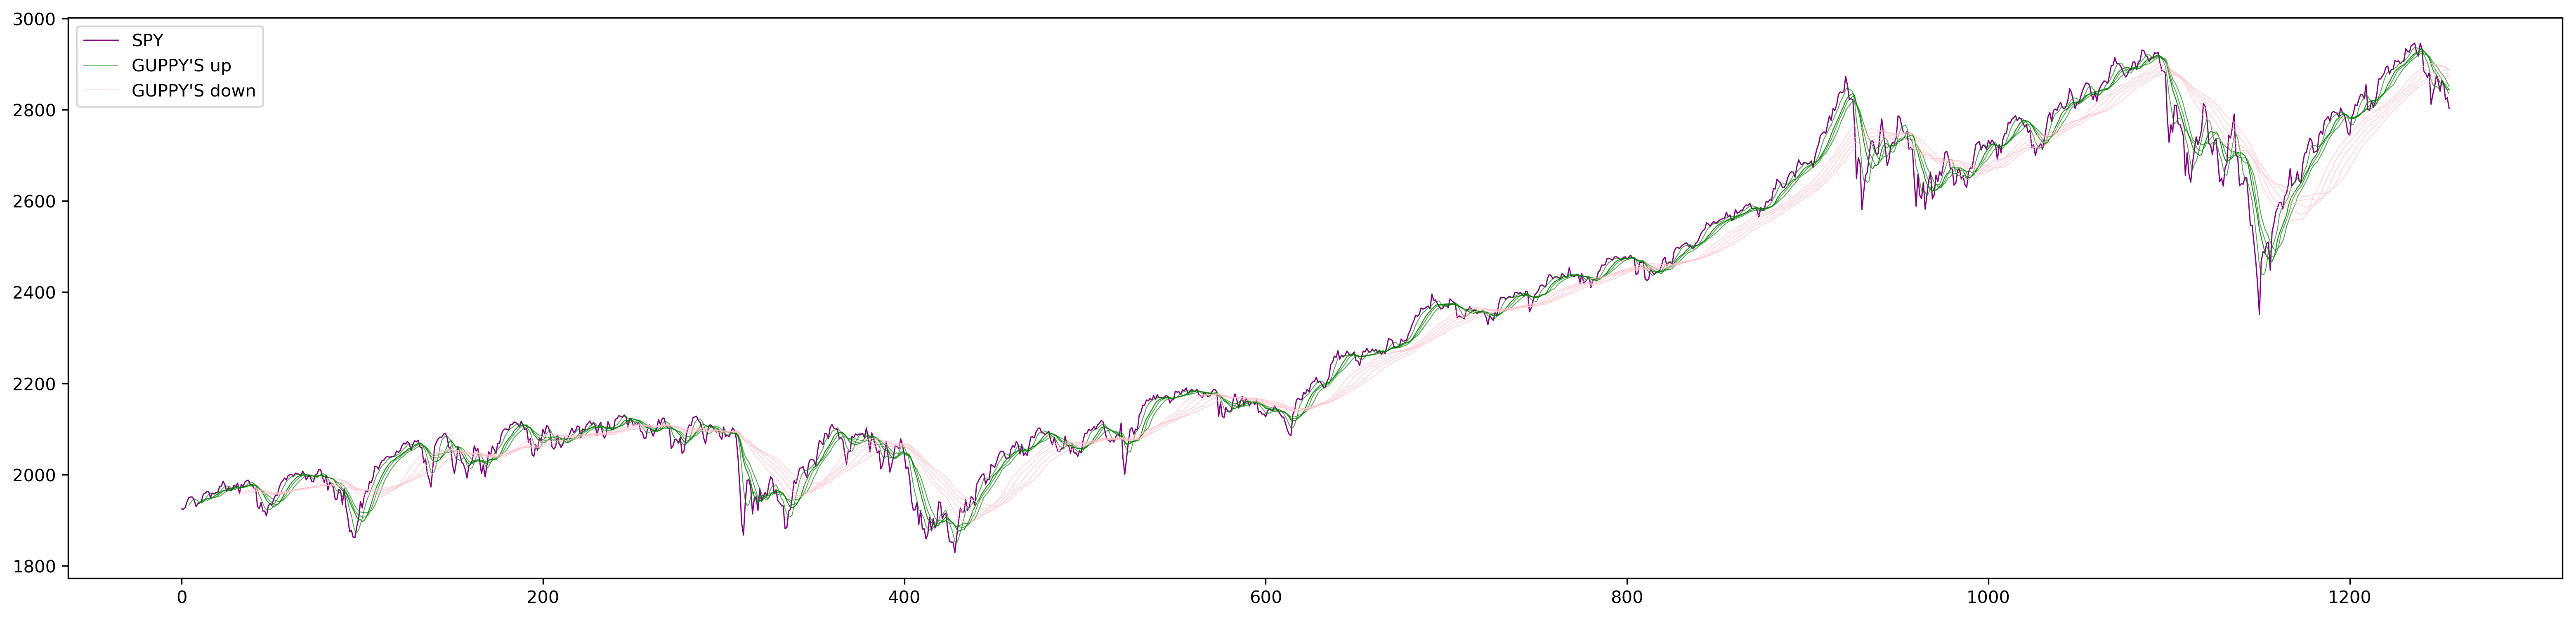

In [1756]:
plt.figure(figsize=(26,6),dpi=300)
plt.plot(dataset_1D['Close'],label = 'SPY',color='purple',lw=0.7)
plt.plot(sma5,label = "GUPPY'S up", color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma12, color='g', alpha=0.7,lw=0.5)
plt.plot(sma15, color='g', alpha=0.7,lw=0.5)
plt.plot(sma30, label = "GUPPY'S down", color='pink', alpha=0.7,lw=0.5)
plt.plot(sma35, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma40, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma45, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma50, color='pink', alpha=0.7,lw=0.5)
plt.legend()
plt.show()

In [1757]:
delta5_8.shape,delta8_10.shape, delta10_12.shape, delta12_15.shape, delta15_30 .shape,delta30_35.shape,delta35_40.shape,delta40_45.shape, delta45_50.shape

((1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,))

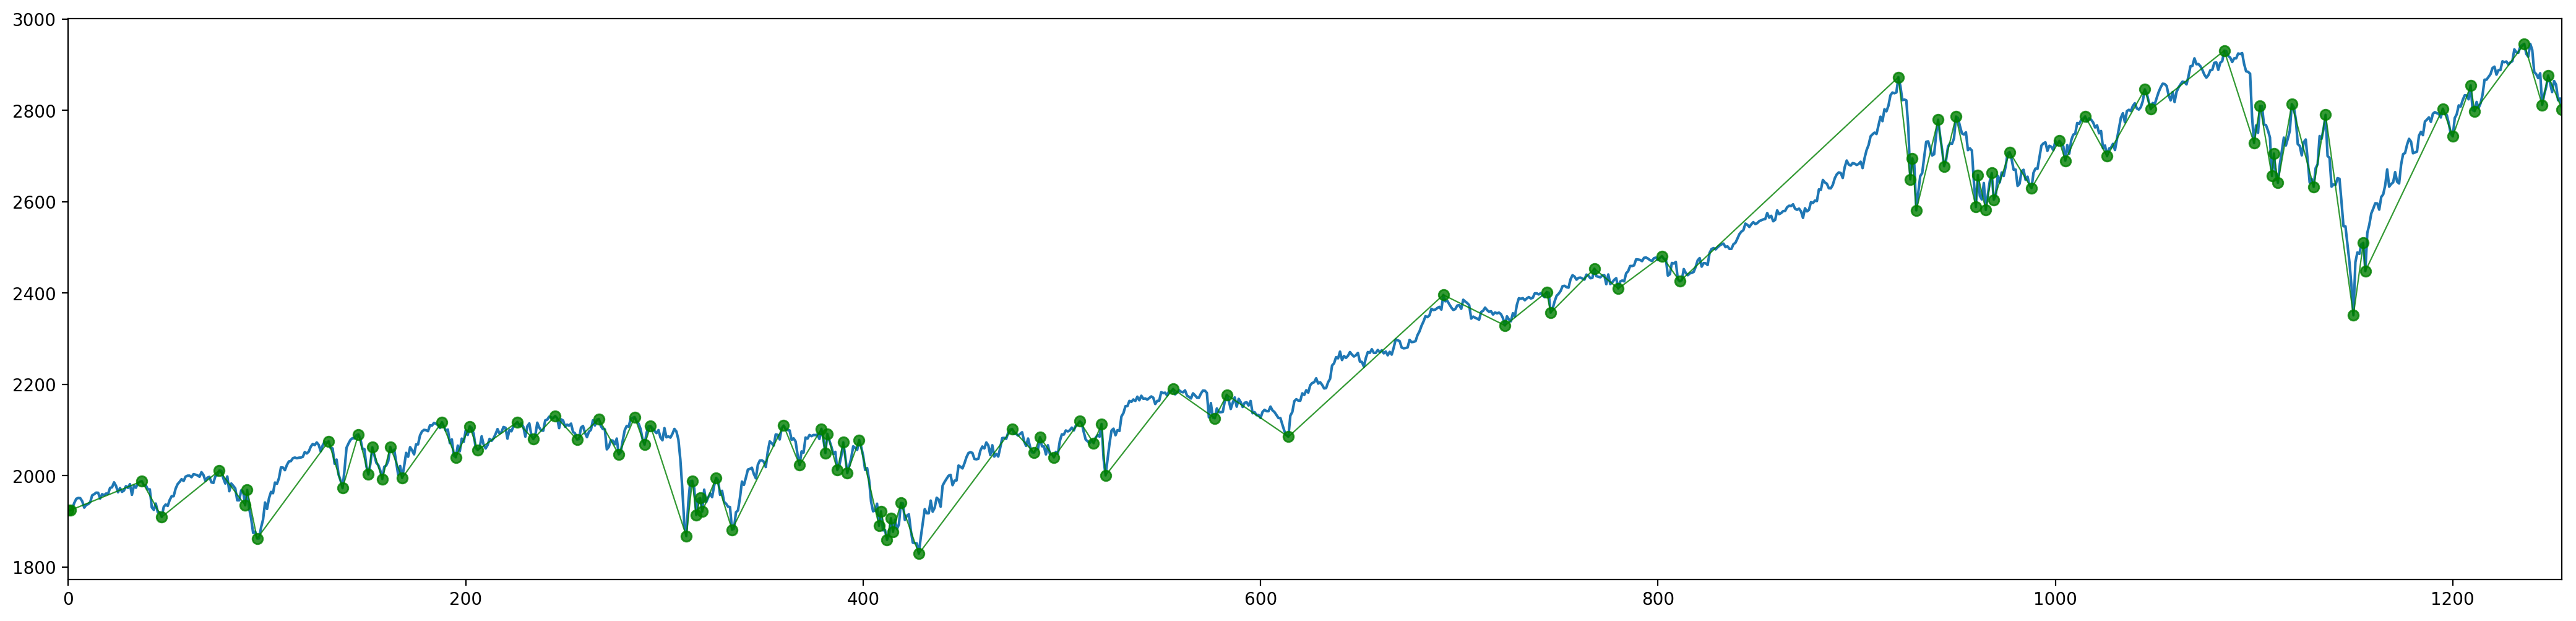

In [1758]:
X = dataset_1D['Close']
pivots = peak_valley_pivots(X.values, 0.015, -0.015)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
plt.figure(figsize=(26,6),dpi=200)
X.plot()
ts_pivots.plot(style='g-o',lw=0.8,alpha=0.8);

peak = []
valley = []

for i in range(0,dataset_1D.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)
        

In [1759]:
len(pivots)

1256

In [1760]:
bbdelta = upper - middle
price_bolup = dataset_1D['Close'] - lower
price_bolow = dataset_1D['Close'] - upper

In [1761]:
ts_pivots.shape,bbdelta.shape,price_bolup.shape,price_bolow.shape

((112,), (1256,), (1256,), (1256,))

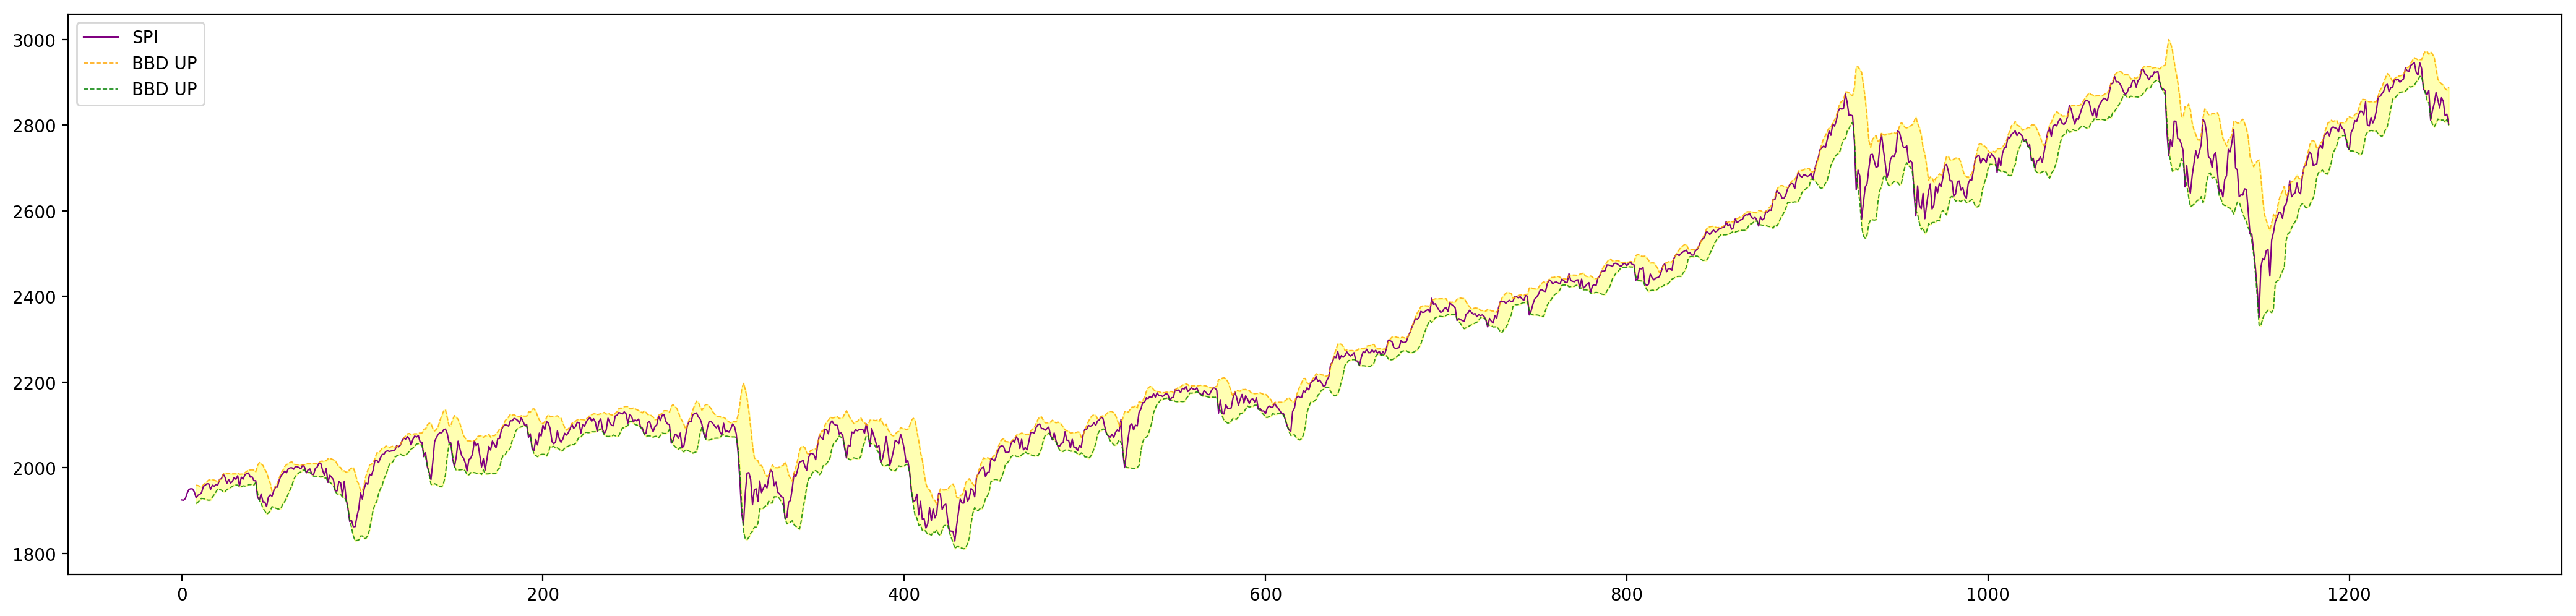

In [1762]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPI',color='purple',lw=0.8)
plt.plot(upper,label='BBD UP',color = 'orange',linestyle='--',lw=0.7,alpha=0.8)
plt.plot(lower,label='BBD UP',color = 'green',linestyle='--',lw=0.7,alpha=0.8)
plt.fill_between(x=dataset_1D.index,y1=upper,y2=lower,color='yellow',alpha=0.3)
plt.legend()
plt.show()

In [1763]:
rsi25_list = []
rsi75_list = []
for i in range(0,dataset_1D.shape[0]):
    rsi75_list.append(75 - rsi[i])
    rsi25_list.append(rsi[i] - 25)

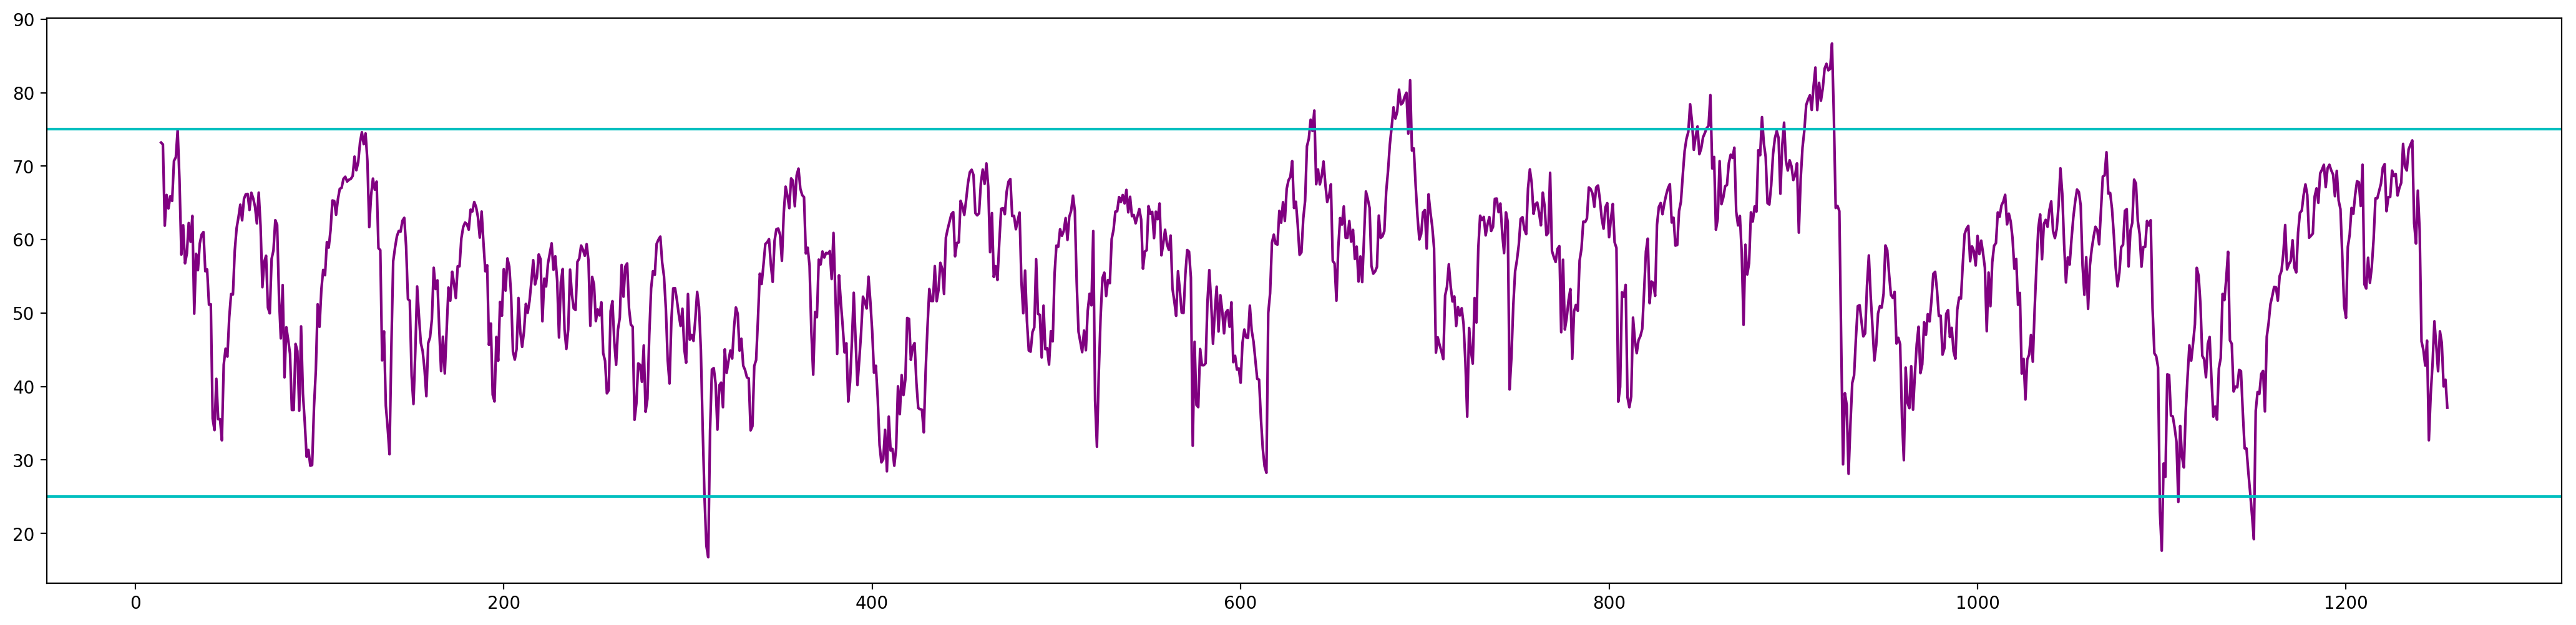

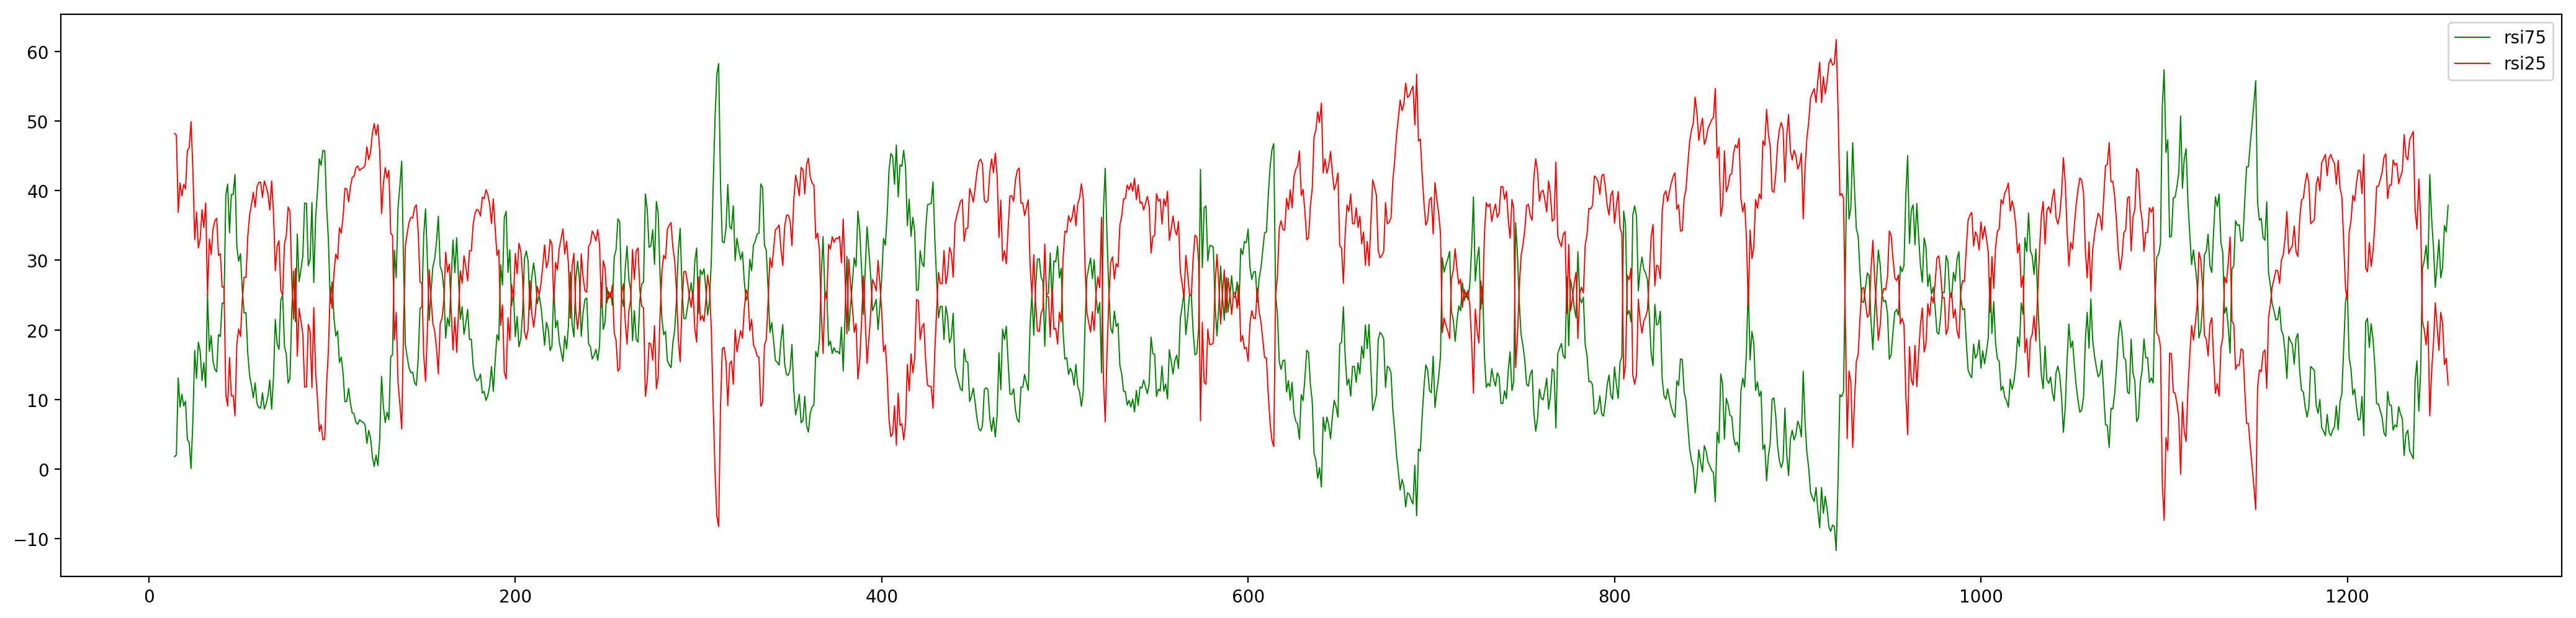

In [1764]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi,label = 'RSI',color='purple')
plt.axhline(y=75,color='c')
plt.axhline(y=25,color='c')

plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi75_list,label='rsi75',color='green',lw=0.7)
plt.plot(rsi25_list,label='rsi25',color='r',lw=0.7)

plt.legend()
plt.show()

In [1765]:
varop_spy = dataset_1D['Open'] - dataset_1D['Close']
varhl_spy = dataset_1D['High'] - dataset_1D['Low']
varop_vix = vix['Open'] - vix['Close']
varhl_vix = vix['High'] - vix['Low']

In [1766]:
varop_spy.shape,varhl_spy.shape,varop_vix.shape,varhl_vix.shape

((1256,), (1256,), (1256,), (1256,))

In [1767]:
dataset_1D['Varop_Spy'] = varop_spy
dataset_1D['Varhl_spy'] = varhl_spy
dataset_1D['Varop_vix'] = varop_vix
dataset_1D['Varhl_vix'] = varhl_vix
dataset_1D['RSI'] = rsi
dataset_1D['75 - RSI'] = np.array(rsi75_list)
dataset_1D['RSI - 25'] = np.array(rsi25_list)

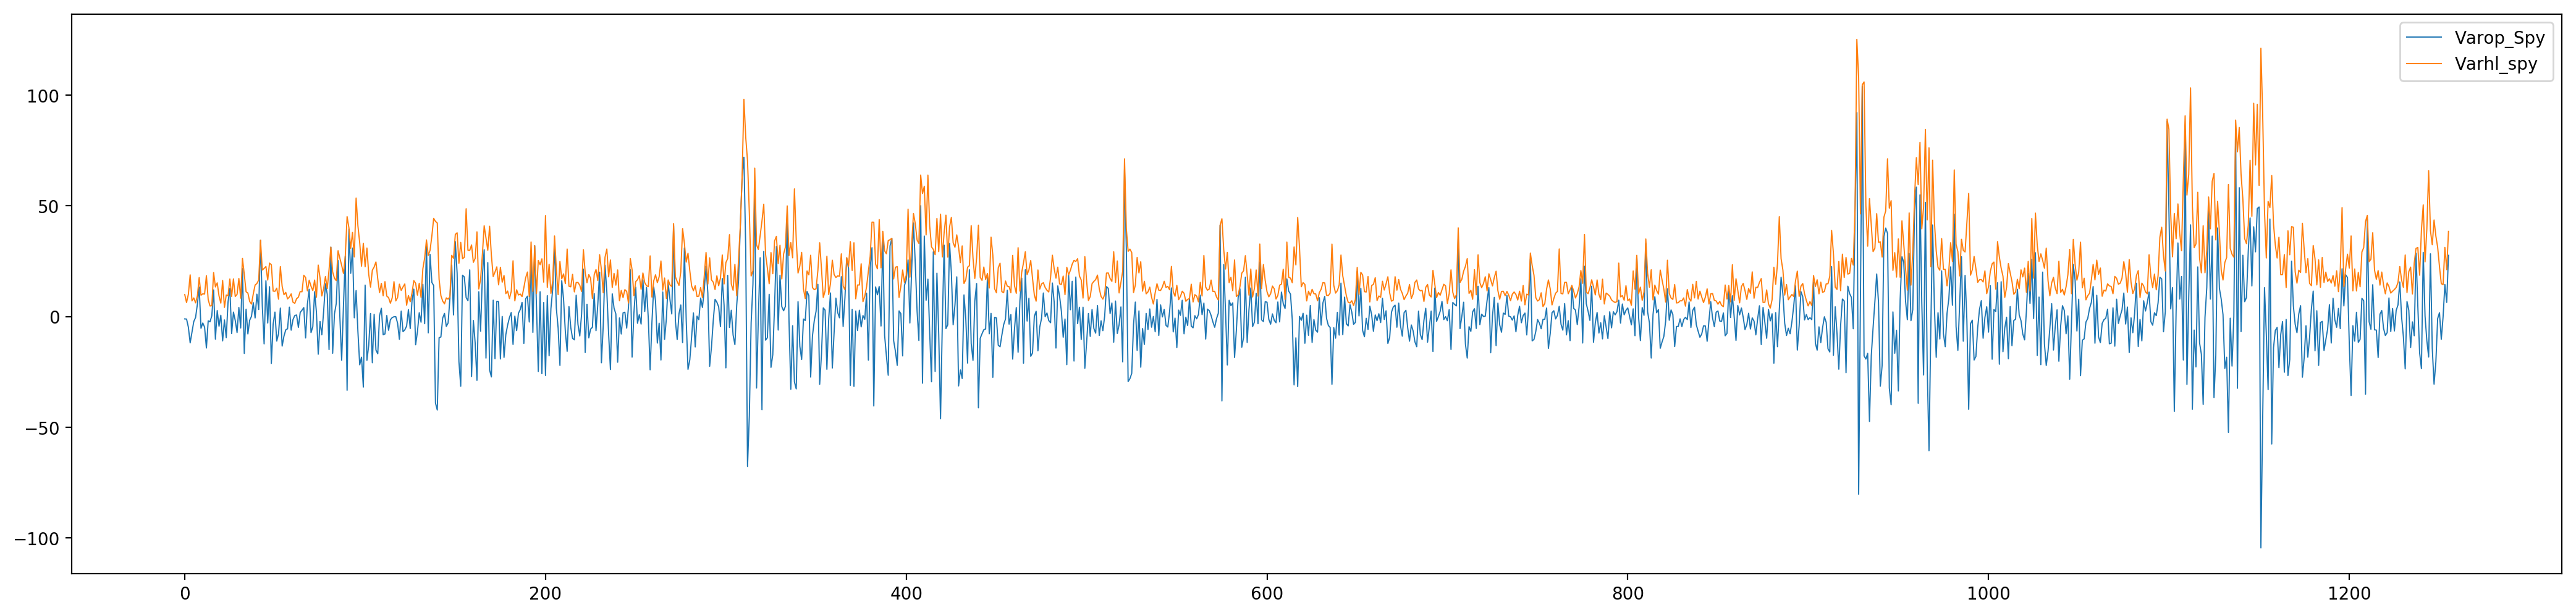

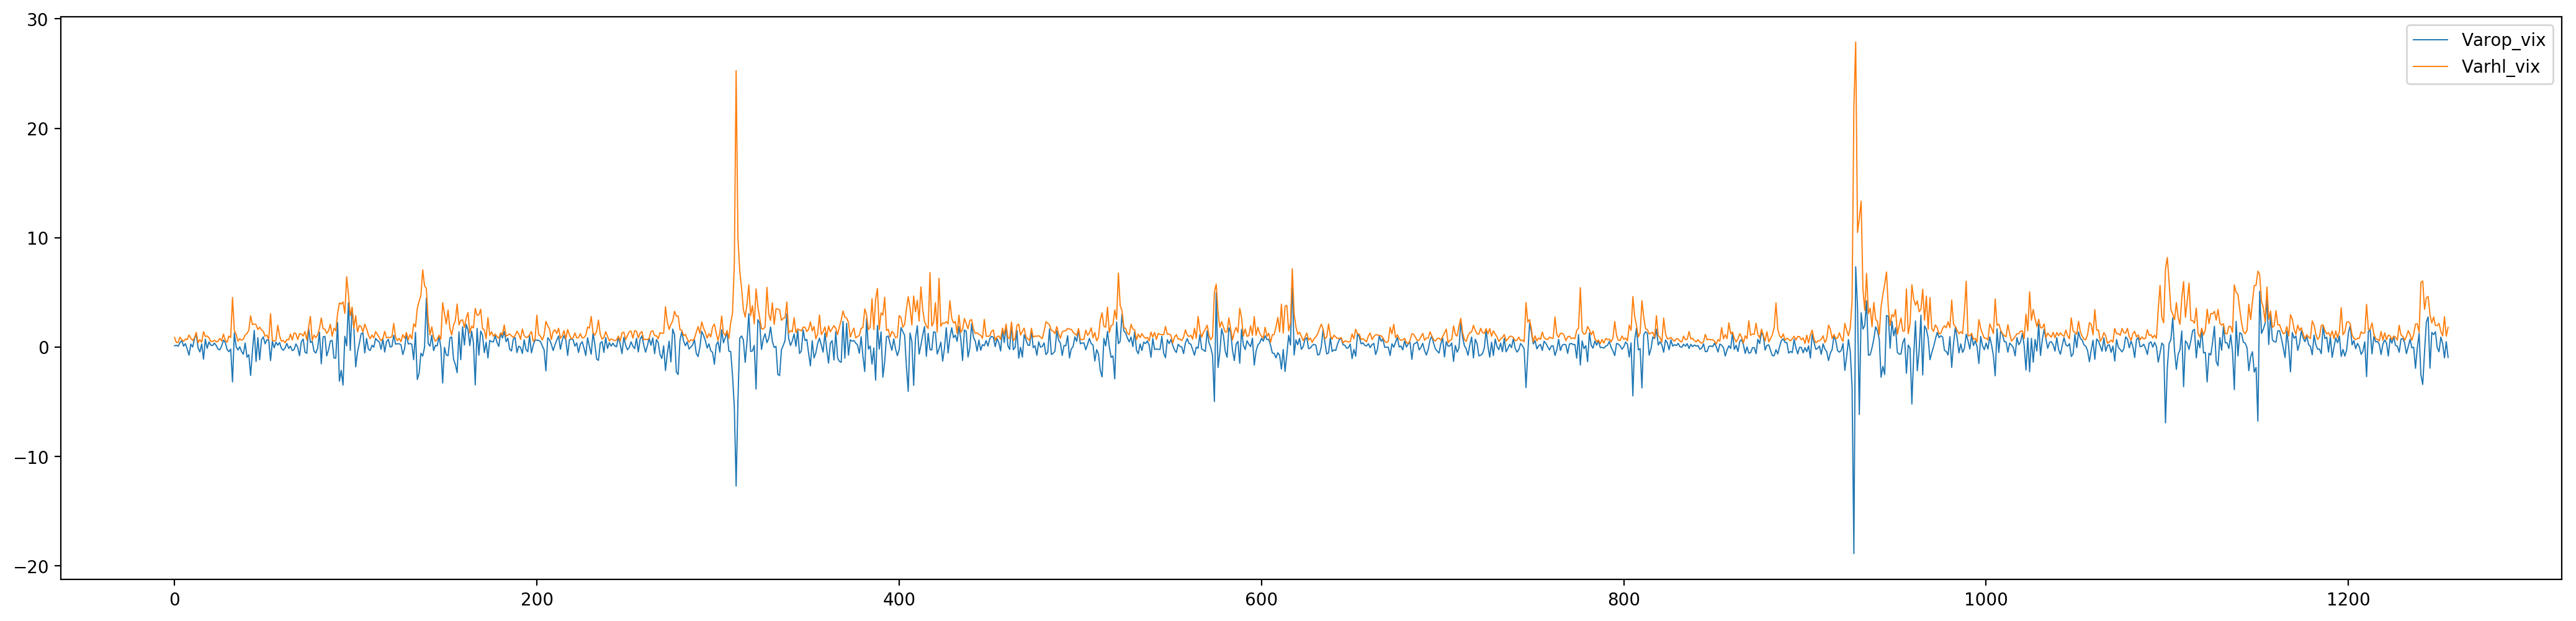

In [1768]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_Spy'],label = 'Varop_Spy',lw=0.7)
plt.plot(dataset_1D['Varhl_spy'],label = 'Varhl_spy',lw=0.7)
plt.legend()


plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_vix'],label = 'Varop_vix',lw=0.7)
plt.plot(dataset_1D['Varhl_vix'],label = 'Varhl_vix',lw=0.7)
plt.legend()
plt.show()

In [1769]:
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1251  20190521  2854.02  2868.88  2854.02  2864.36  14.95      1.46   
1252  20190522  2856.06  2865.47  2851.11  2856.27  14.75      1.03   
1253  20190523  2836.70  2836.70  2805.49  2822.24  16.92      1.45   
1254  20190524  2832.41  2841.36  2820.19  2826.06  15.85      0.99   
1255  20190528  2830.03  2840.51  2802.06  2802.39  17.50      1.33   

      Varop_Spy  Varhl_spy  Varop_vix  Varhl_vix        RSI   75 - RSI  \
1251     -10.34      14.86       0.91       1.43  47.518075  27.481925   
1252      -0.21      14.36       0.31       1.02  45.958240  29.041760   
1253      14.46      31.21      -0.99       2.77  40.008829  34.991171   
1254       6.35      21.17       0.49       1.00  40.933187  34.066813   
1255      27.64      38.45      -0.95       1.80  37.116875  37.883125   

       RSI - 25  
1251  22.518075  
1252  20.958240  
1253  15.008829  
1254  15.933187  
1255  12.116875

In [1770]:
dataset_1D['BBD_Delta_Up'] = bbdelta

dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1251  20190521  2854.02  2868.88  2854.02  2864.36  14.95      1.46   
1252  20190522  2856.06  2865.47  2851.11  2856.27  14.75      1.03   
1253  20190523  2836.70  2836.70  2805.49  2822.24  16.92      1.45   
1254  20190524  2832.41  2841.36  2820.19  2826.06  15.85      0.99   
1255  20190528  2830.03  2840.51  2802.06  2802.39  17.50      1.33   

      Varop_Spy  Varhl_spy  Varop_vix  Varhl_vix        RSI   75 - RSI  \
1251     -10.34      14.86       0.91       1.43  47.518075  27.481925   
1252      -0.21      14.36       0.31       1.02  45.958240  29.041760   
1253      14.46      31.21      -0.99       2.77  40.008829  34.991171   
1254       6.35      21.17       0.49       1.00  40.933187  34.066813   
1255      27.64      38.45      -0.95       1.80  37.116875  37.883125   

       RSI - 25  BBD_Delta_Up  
1251  22.518075     42.281419  
1252  20.958240     40.753802  
1253  15.008829     39.248553  
1254  15.933187     34.444661  
1255  12.116875     44.420289

In [1771]:
dataset_1D['delta5_8'] = delta5_8
dataset_1D['delta8_10'] = delta8_10
dataset_1D['delta10_12'] = delta10_12
dataset_1D['delta12_15'] = delta12_15
dataset_1D['delta15_30'] = delta15_30
dataset_1D['delta30_35'] = delta30_35
dataset_1D['delta35_40'] = delta35_40
dataset_1D['delta40_45'] = delta40_45
dataset_1D['delta45_50'] = delta45_50

In [1772]:
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1251  20190521  2854.02  2868.88  2854.02  2864.36  14.95      1.46   
1252  20190522  2856.06  2865.47  2851.11  2856.27  14.75      1.03   
1253  20190523  2836.70  2836.70  2805.49  2822.24  16.92      1.45   
1254  20190524  2832.41  2841.36  2820.19  2826.06  15.85      0.99   
1255  20190528  2830.03  2840.51  2802.06  2802.39  17.50      1.33   

      Varop_Spy  Varhl_spy  Varop_vix  ...  BBD_Delta_Up  delta5_8  delta8_10  \
1251     -10.34      14.86       0.91  ...     42.281419   5.89500   -4.53700   
1252      -0.21      14.36       0.31  ...     40.753802  10.09825   -5.36325   
1253      14.46      31.21      -0.99  ...     39.248553  -2.01400    0.78100   
1254       6.35      21.17       0.49  ...     34.444661  -7.66425    5.27125   
1255      27.64      38.45      -0.95  ...     44.420289  -9.16100    0.14800   

      delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
1251   -8.556333  -12.697000  -17.714667    2.026000    8.211500    7.055833   
1252   -4.521333  -14.549667  -21.481000    1.608429    6.952821    7.474417   
1253   -4.218500  -13.348500  -25.634000    0.871143    5.069357    7.940389   
1254   -5.305833   -9.823167  -31.530667    0.319524    3.280143    8.846333   
1255   -0.559667   -6.845333  -36.702000   -0.599714    1.498964    8.008750   

      delta45_50  
1251    6.532867  
1252    5.764533  
1253    5.493911  
1254    4.501867  
1255    4.941000  

[5 rows x 24 columns]

In [1773]:
spread = dataset_1D['Close'] - dataset_1D['Vix']
dataset_1D['Spread'] = spread
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1251  20190521  2854.02  2868.88  2854.02  2864.36  14.95      1.46   
1252  20190522  2856.06  2865.47  2851.11  2856.27  14.75      1.03   
1253  20190523  2836.70  2836.70  2805.49  2822.24  16.92      1.45   
1254  20190524  2832.41  2841.36  2820.19  2826.06  15.85      0.99   
1255  20190528  2830.03  2840.51  2802.06  2802.39  17.50      1.33   

      Varop_Spy  Varhl_spy  Varop_vix  ...  delta5_8  delta8_10  delta10_12  \
1251     -10.34      14.86       0.91  ...   5.89500   -4.53700   -8.556333   
1252      -0.21      14.36       0.31  ...  10.09825   -5.36325   -4.521333   
1253      14.46      31.21      -0.99  ...  -2.01400    0.78100   -4.218500   
1254       6.35      21.17       0.49  ...  -7.66425    5.27125   -5.305833   
1255      27.64      38.45      -0.95  ...  -9.16100    0.14800   -0.559667   

      delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  delta45_50  \
1251  -12.697000  -17.714667    2.026000    8.211500    7.055833    6.532867   
1252  -14.549667  -21.481000    1.608429    6.952821    7.474417    5.764533   
1253  -13.348500  -25.634000    0.871143    5.069357    7.940389    5.493911   
1254   -9.823167  -31.530667    0.319524    3.280143    8.846333    4.501867   
1255   -6.845333  -36.702000   -0.599714    1.498964    8.008750    4.941000   

       Spread  
1251  2849.41  
1252  2841.52  
1253  2805.32  
1254  2810.21  
1255  2784.89  

[5 rows x 25 columns]

In [1774]:
len(peak),len(valley),len(ts_pivots)

(1256, 1256, 112)

In [1775]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

count  -1    425.000000
        1    830.000000
mean   -1     -0.005210
        1      0.003174
std    -1      0.008818
        1      0.006570
min    -1     -0.040979
        1     -0.014157
25%    -1     -0.009231
        1     -0.000868
50%    -1     -0.002987
        1      0.001790
75%    -1      0.000016
        1      0.006252
max    -1      0.014677
        1      0.049594
dtype: float64

In [1776]:
compute_segment_returns(X, pivots).sum()

0.0

In [1777]:

max_drawdown(np.array(X))

0.1977821376780688

In [1778]:
dataset_1D['Peaks'] = abs(np.array(peak))
dataset_1D['Valley'] = abs(np.array(valley))
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1251  20190521  2854.02  2868.88  2854.02  2864.36  14.95      1.46   
1252  20190522  2856.06  2865.47  2851.11  2856.27  14.75      1.03   
1253  20190523  2836.70  2836.70  2805.49  2822.24  16.92      1.45   
1254  20190524  2832.41  2841.36  2820.19  2826.06  15.85      0.99   
1255  20190528  2830.03  2840.51  2802.06  2802.39  17.50      1.33   

      Varop_Spy  Varhl_spy  Varop_vix  ...  delta10_12  delta12_15  \
1251     -10.34      14.86       0.91  ...   -8.556333  -12.697000   
1252      -0.21      14.36       0.31  ...   -4.521333  -14.549667   
1253      14.46      31.21      -0.99  ...   -4.218500  -13.348500   
1254       6.35      21.17       0.49  ...   -5.305833   -9.823167   
1255      27.64      38.45      -0.95  ...   -0.559667   -6.845333   

      delta15_30  delta30_35  delta35_40  delta40_45  delta45_50   Spread  \
1251  -17.714667    2.026000    8.211500    7.055833    6.532867  2849.41   
1252  -21.481000    1.608429    6.952821    7.474417    5.764533  2841.52   
1253  -25.634000    0.871143    5.069357    7.940389    5.493911  2805.32   
1254  -31.530667    0.319524    3.280143    8.846333    4.501867  2810.21   
1255  -36.702000   -0.599714    1.498964    8.008750    4.941000  2784.89   

      Peaks  Valley  
1251      0       0  
1252      0       0  
1253      0       0  
1254      0       0  
1255      0       1  

[5 rows x 27 columns]

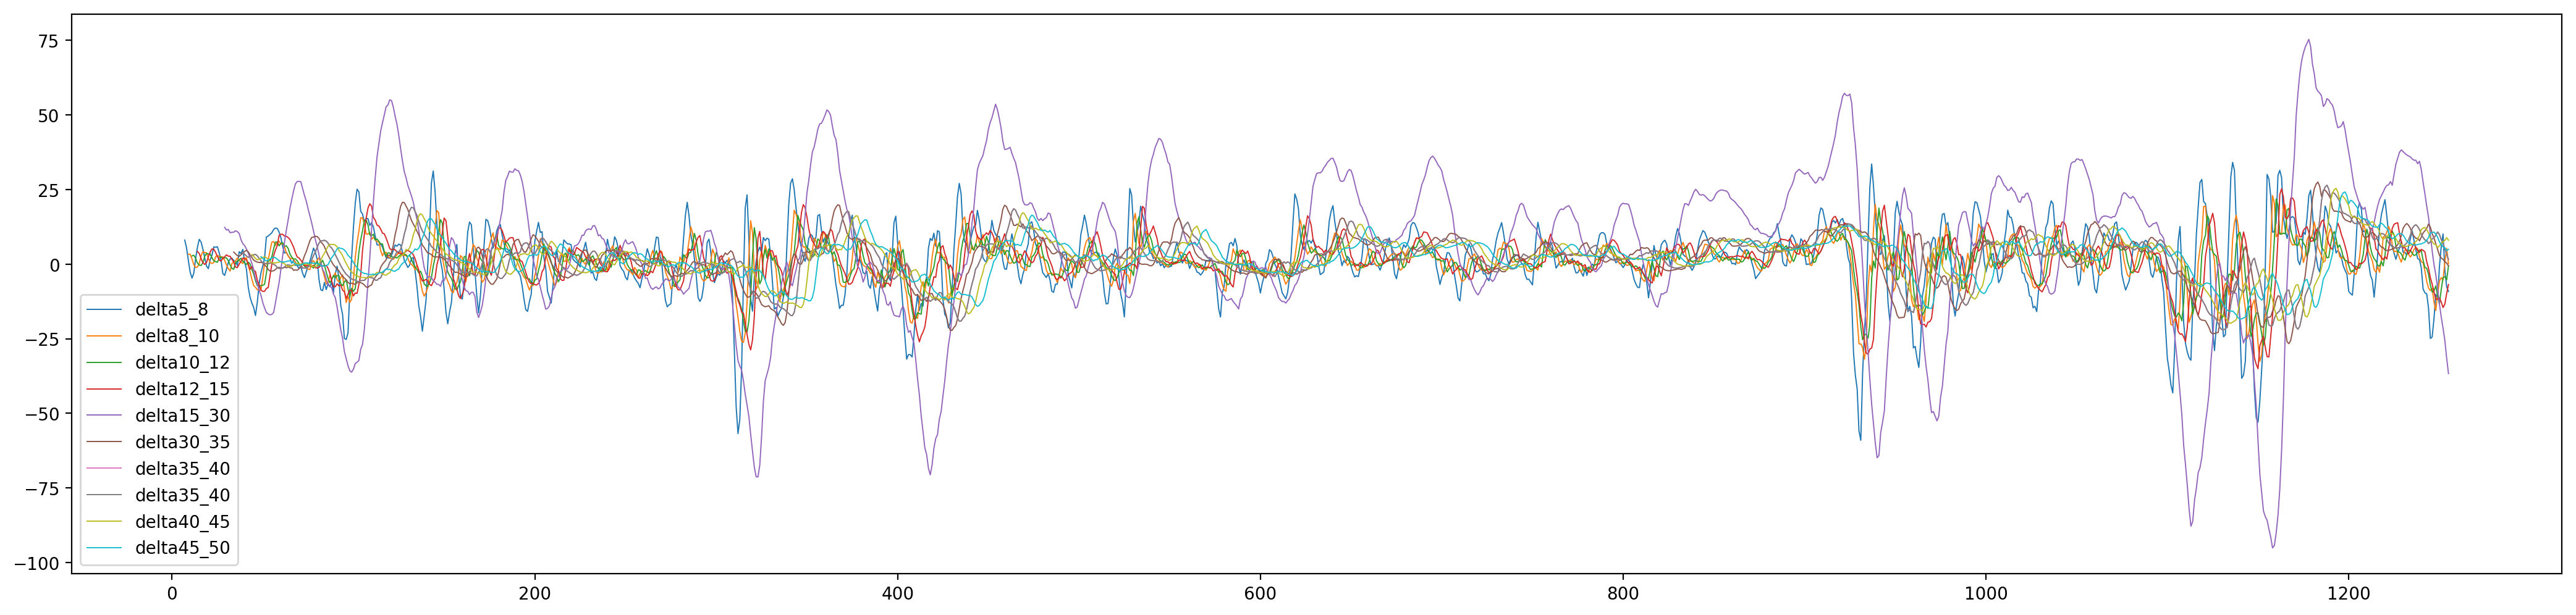

In [1779]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.7)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.7)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.7)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.7)
plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.7)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.7)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.7)
plt.legend()

delta_1_2 = []
delta_1_3 =[]
delta_2_3 = []

delta_1_2.append(0)
delta_1_3.append(0)

delta_2_3.append(0)



for i in range(1,dataset_1D.shape[0]-1):
    delta_1_2.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-1,4])
        
for i in range(1,dataset_1D.shape[0]-2):
     delta_1_3.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-2,4])
    
for i in range(1,dataset_1D.shape[0]-2):
     delta_2_3.append(dataset_1D.iloc[-i-1,4] - dataset_1D.iloc[-i-2,4])

delta_1_2.append(0)
delta_1_3.append(0)
delta_2_3.append(0)
delta_1_3.append(0)
delta_2_3.append(0)


len(delta_1_2),len(delta_1_3),len(delta_2_3)

dataset_1D['delta_1_2'] = delta_1_2
dataset_1D['delta_2_3'] = delta_2_3
dataset_1D['delta_1_3'] = delta_1_3

In [1780]:
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1251  20190521  2854.02  2868.88  2854.02  2864.36  14.95      1.46   
1252  20190522  2856.06  2865.47  2851.11  2856.27  14.75      1.03   
1253  20190523  2836.70  2836.70  2805.49  2822.24  16.92      1.45   
1254  20190524  2832.41  2841.36  2820.19  2826.06  15.85      0.99   
1255  20190528  2830.03  2840.51  2802.06  2802.39  17.50      1.33   

      Varop_Spy  Varhl_spy  Varop_vix  ...  delta10_12  delta12_15  \
1251     -10.34      14.86       0.91  ...   -8.556333  -12.697000   
1252      -0.21      14.36       0.31  ...   -4.521333  -14.549667   
1253      14.46      31.21      -0.99  ...   -4.218500  -13.348500   
1254       6.35      21.17       0.49  ...   -5.305833   -9.823167   
1255      27.64      38.45      -0.95  ...   -0.559667   -6.845333   

      delta15_30  delta30_35  delta35_40  delta40_45  delta45_50   Spread  \
1251  -17.714667    2.026000    8.211500    7.055833    6.532867  2849.41   
1252  -21.481000    1.608429    6.952821    7.474417    5.764533  2841.52   
1253  -25.634000    0.871143    5.069357    7.940389    5.493911  2805.32   
1254  -31.530667    0.319524    3.280143    8.846333    4.501867  2810.21   
1255  -36.702000   -0.599714    1.498964    8.008750    4.941000  2784.89   

      Peaks  Valley  
1251      0       0  
1252      0       0  
1253      0       0  
1254      0       0  
1255      0       1  

[5 rows x 27 columns]

In [1781]:
tsf = talib.TSF(dataset_1D['Close'],timeperiod=14)
type(tsf),len(tsf)

(pandas.core.series.Series, 1256)

In [1782]:
delta_tsf = dataset_1D['Close'] - tsf
dataset_1D['delta_tsf'] = tsf
delta_tsf.shape

(1256,)

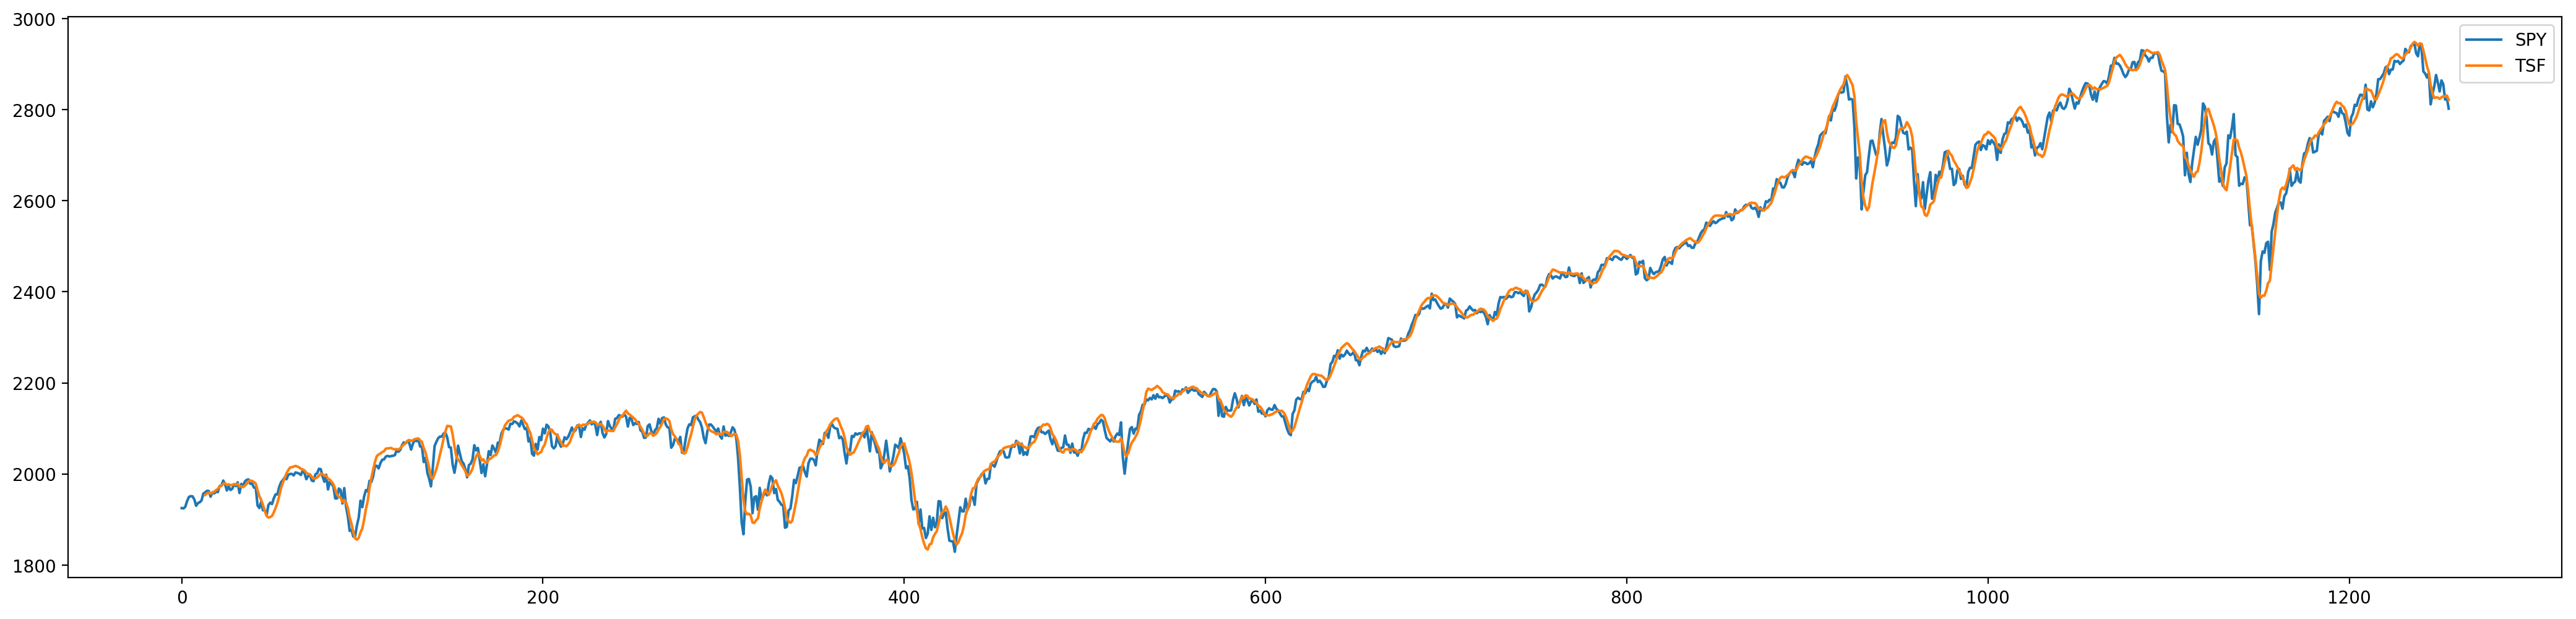

In [1783]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(tsf,label='TSF')
plt.legend()
plt.show()

In [1784]:
forosc = []
forosc.append(0)
for i in range(1,dataset_1D.shape[0]):
    forosc.append((dataset_1D.iloc[i,4] - tsf[i-1])*100/dataset_1D.iloc[i,4])
len(forosc),type(forosc)

(1256, list)

In [1785]:
dataset_1D['Forcast Oscillator'] = (forosc)

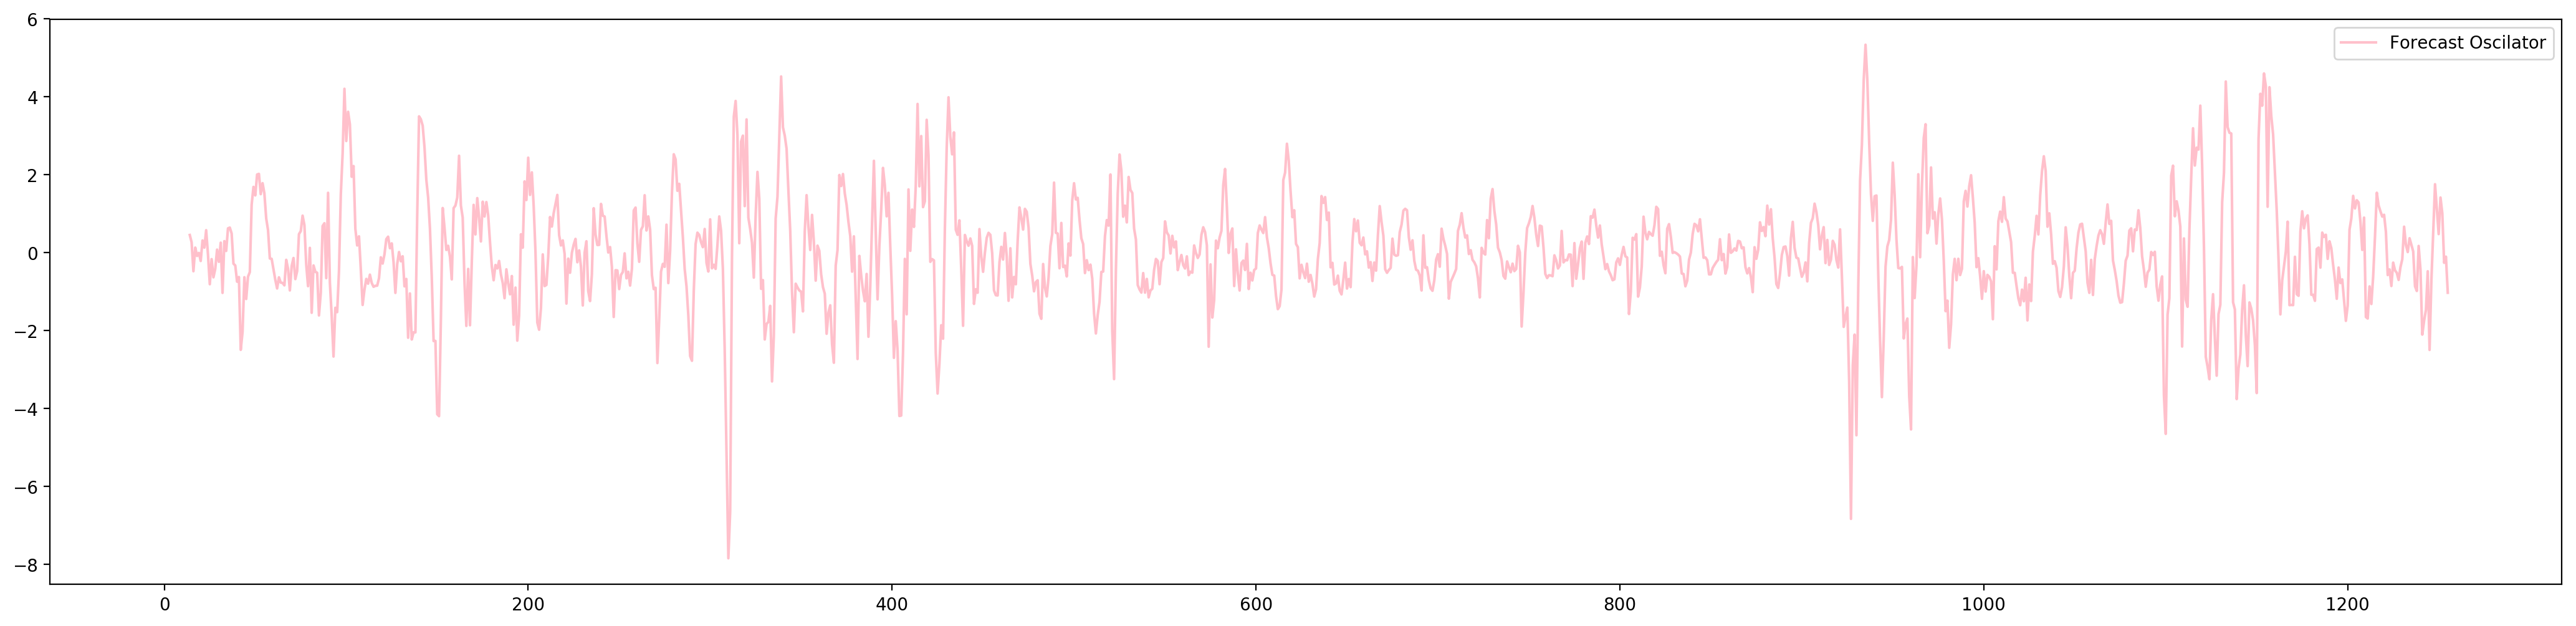

In [1786]:
plt.figure(figsize=(26,6),dpi=200)
#plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(dataset_1D['Forcast Oscillator'],label='Forecast Oscilator',color='pink')
plt.legend()
plt.show()

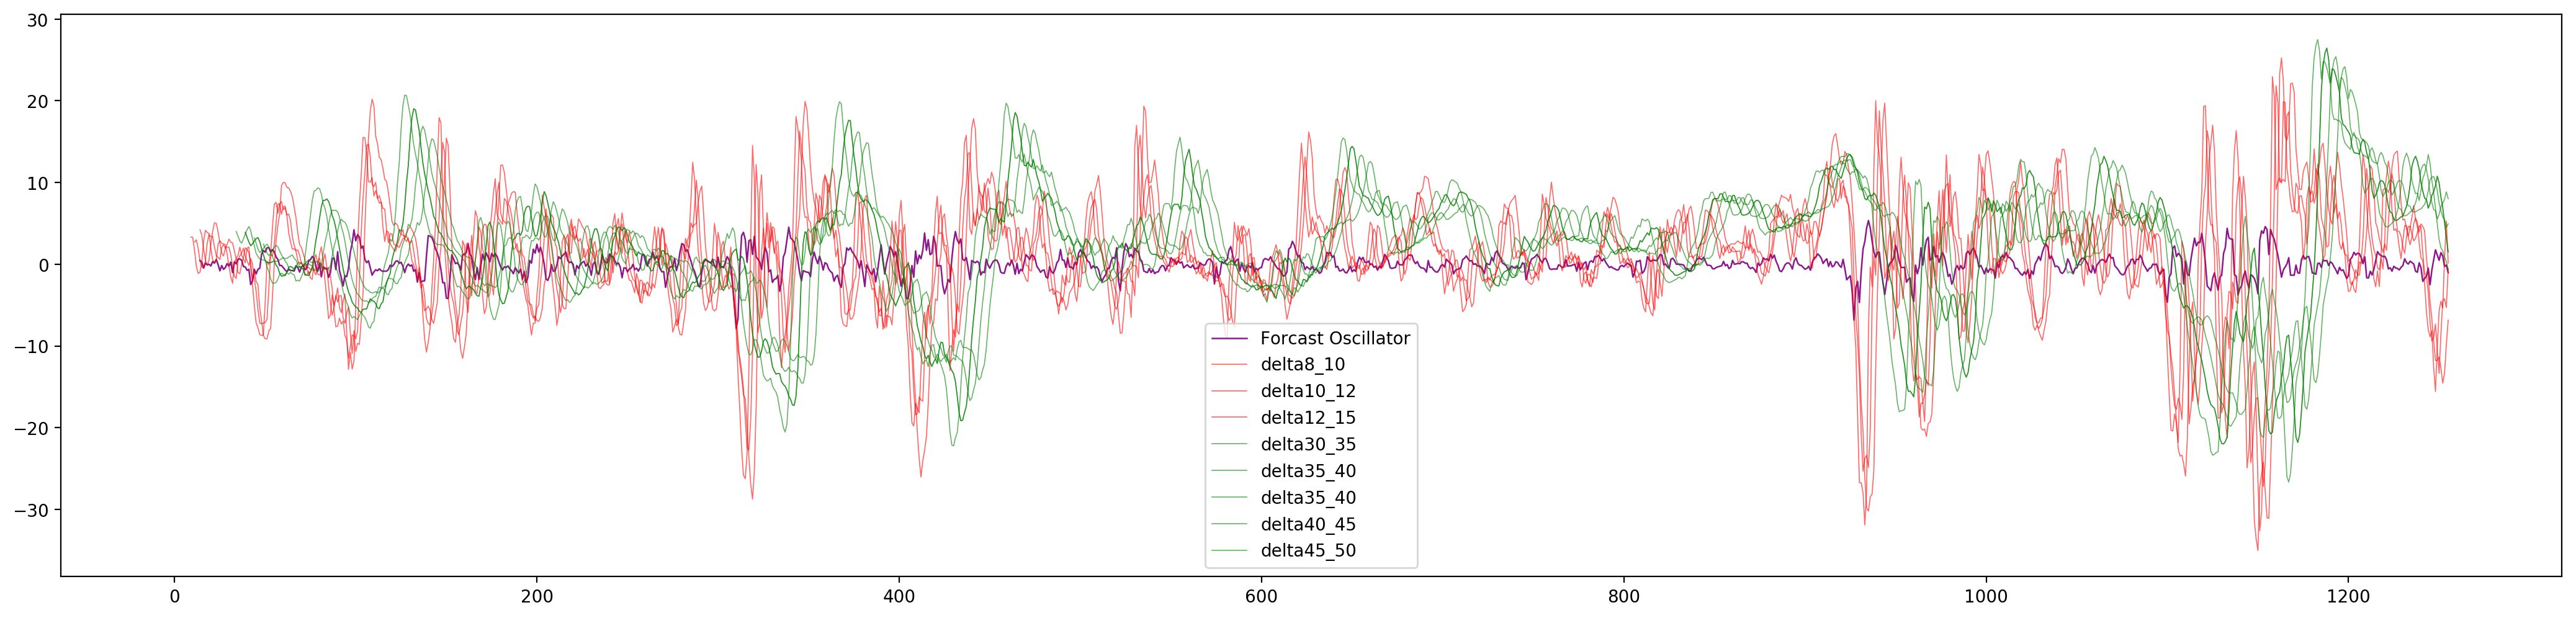

In [1787]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Forcast Oscillator'],label = 'Forcast Oscillator',lw=0.9,color='purple',alpha=0.9)
#plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.6,color='r',alpha=0.6)
#plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.6,color='g',alpha=0.6)
plt.legend()

In [1788]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 29 columns):
Date                  1256 non-null int64
Open                  1256 non-null float64
High                  1256 non-null float64
Low                   1256 non-null float64
Close                 1256 non-null float64
Vix                   1256 non-null float64
P/C Ratio             1256 non-null object
Varop_Spy             1256 non-null float64
Varhl_spy             1256 non-null float64
Varop_vix             1256 non-null float64
Varhl_vix             1256 non-null float64
RSI                   1242 non-null float64
75 - RSI              1242 non-null float64
RSI - 25              1242 non-null float64
BBD_Delta_Up          1248 non-null float64
delta5_8              1249 non-null float64
delta8_10             1247 non-null float64
delta10_12            1245 non-null float64
delta12_15            1242 non-null float64
delta15_30            1227 non-null float64
delta30_35      

In [1789]:
df.head(0)

Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []

In [1790]:
target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    
    if (dataset_1D.iloc[i+1,7] * dataset_1D.iloc[i,7]) < 0 :
        if (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) > 30 : #or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) < -33 : #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)



target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    
    if (dataset_1D.iloc[i+1,7]*dataset_1D.iloc[i,7]) < 0 :
    
        if (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.06 :
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.06 :
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)



In [1791]:
len(target_up),len(target_down)

(1256, 1256)

In [1792]:
dataset_1D['target_up'] = target_up
dataset_1D['target_down'] = target_down

dataset_1D['target_up'].sum(),dataset_1D['target_down'].sum()

(36, 26)

In [1793]:
dataset_1D['target_value'] = dataset_1D['Close']
dataset_1D = dataset_1D.drop(['Open','High','Low','Close'],axis=1)

In [1794]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 28 columns):
Date                  1256 non-null int64
Vix                   1256 non-null float64
P/C Ratio             1256 non-null object
Varop_Spy             1256 non-null float64
Varhl_spy             1256 non-null float64
Varop_vix             1256 non-null float64
Varhl_vix             1256 non-null float64
RSI                   1242 non-null float64
75 - RSI              1242 non-null float64
RSI - 25              1242 non-null float64
BBD_Delta_Up          1248 non-null float64
delta5_8              1249 non-null float64
delta8_10             1247 non-null float64
delta10_12            1245 non-null float64
delta12_15            1242 non-null float64
delta15_30            1227 non-null float64
delta30_35            1222 non-null float64
delta35_40            1217 non-null float64
delta40_45            1212 non-null float64
delta45_50            1207 non-null float64
Spread          

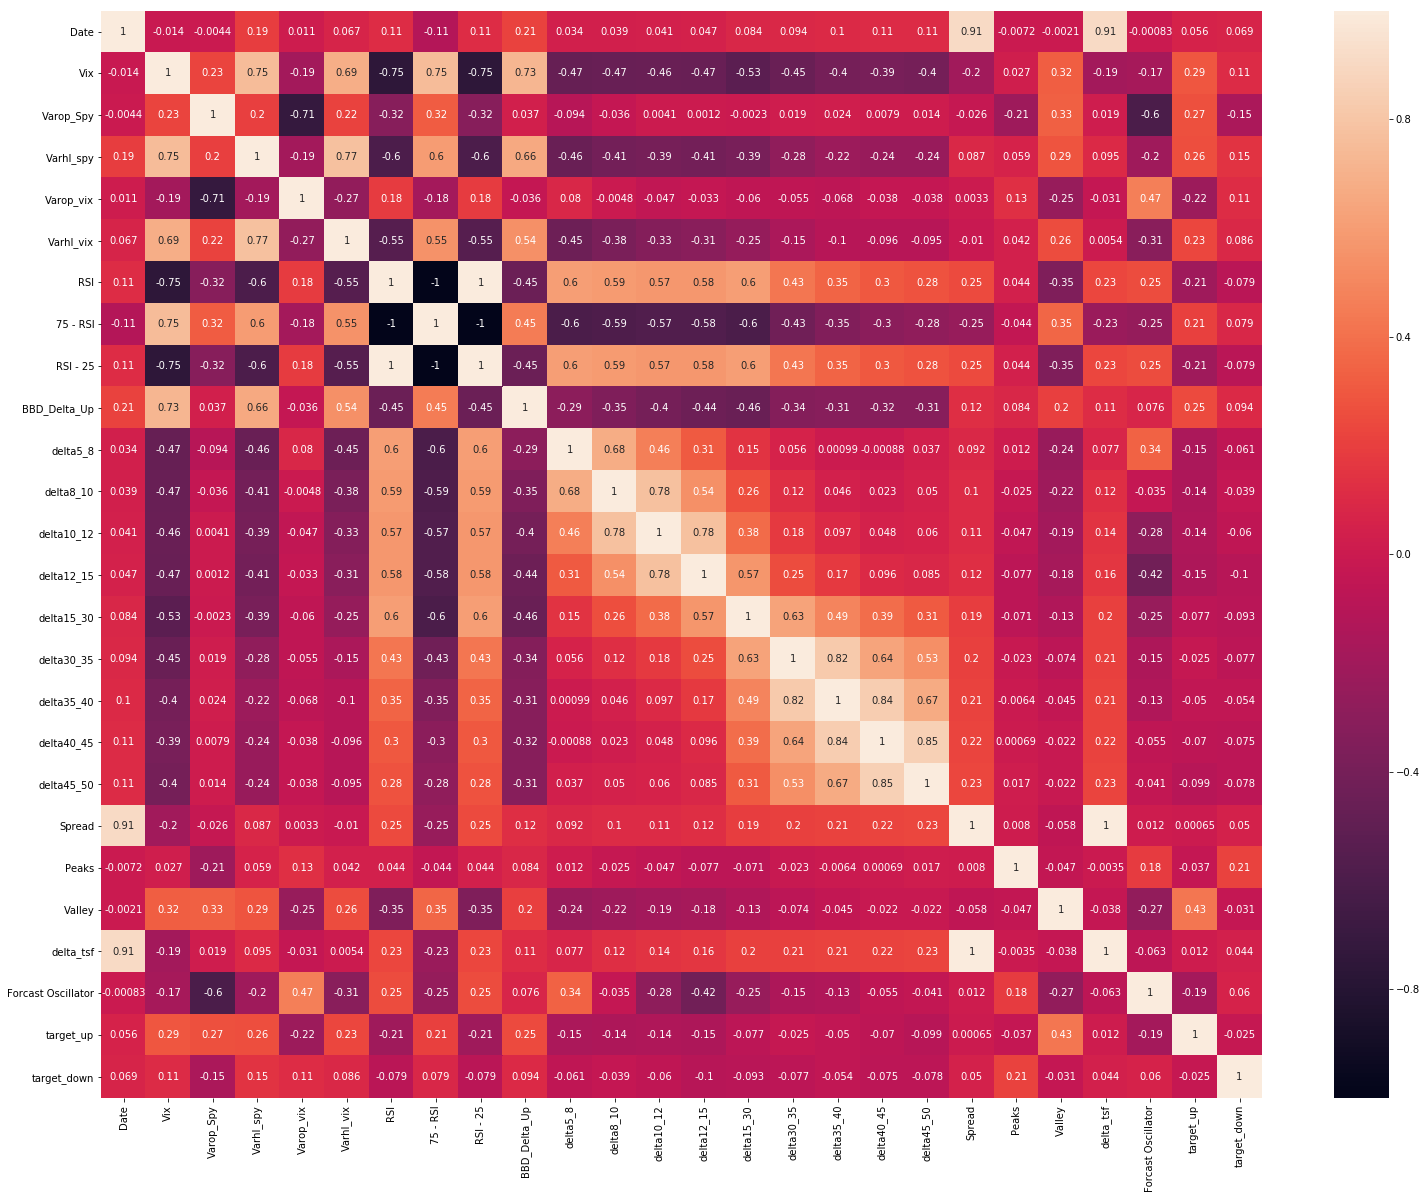

In [1795]:
plt.figure(figsize=(26,20))
sns.heatmap(dataset_1D.iloc[:,:-1].corr(),annot=True)
plt.show()

In [1796]:
dataset_1D.tail()

Date    Vix P/C Ratio  Varop_Spy  Varhl_spy  Varop_vix  Varhl_vix  \
1251  20190521  14.95      1.46     -10.34      14.86       0.91       1.43   
1252  20190522  14.75      1.03      -0.21      14.36       0.31       1.02   
1253  20190523  16.92      1.45      14.46      31.21      -0.99       2.77   
1254  20190524  15.85      0.99       6.35      21.17       0.49       1.00   
1255  20190528  17.50      1.33      27.64      38.45      -0.95       1.80   

            RSI   75 - RSI   RSI - 25  ...  delta40_45  delta45_50   Spread  \
1251  47.518075  27.481925  22.518075  ...    7.055833    6.532867  2849.41   
1252  45.958240  29.041760  20.958240  ...    7.474417    5.764533  2841.52   
1253  40.008829  34.991171  15.008829  ...    7.940389    5.493911  2805.32   
1254  40.933187  34.066813  15.933187  ...    8.846333    4.501867  2810.21   
1255  37.116875  37.883125  12.116875  ...    8.008750    4.941000  2784.89   

      Peaks  Valley    delta_tsf  Forcast Oscillator  target_up  target_down  \
1251      0       0  2827.417253            1.415662          0            0   
1252      0       0  2829.578132            1.010155          0            0   
1253      0       0  2828.979560           -0.260011          0            0   
1254      0       0  2831.224945           -0.103309          0            0   
1255      0       1  2821.702088           -1.028941          0            0   

      target_value  
1251       2864.36  
1252       2856.27  
1253       2822.24  
1254       2826.06  
1255       2802.39  

[5 rows x 28 columns]

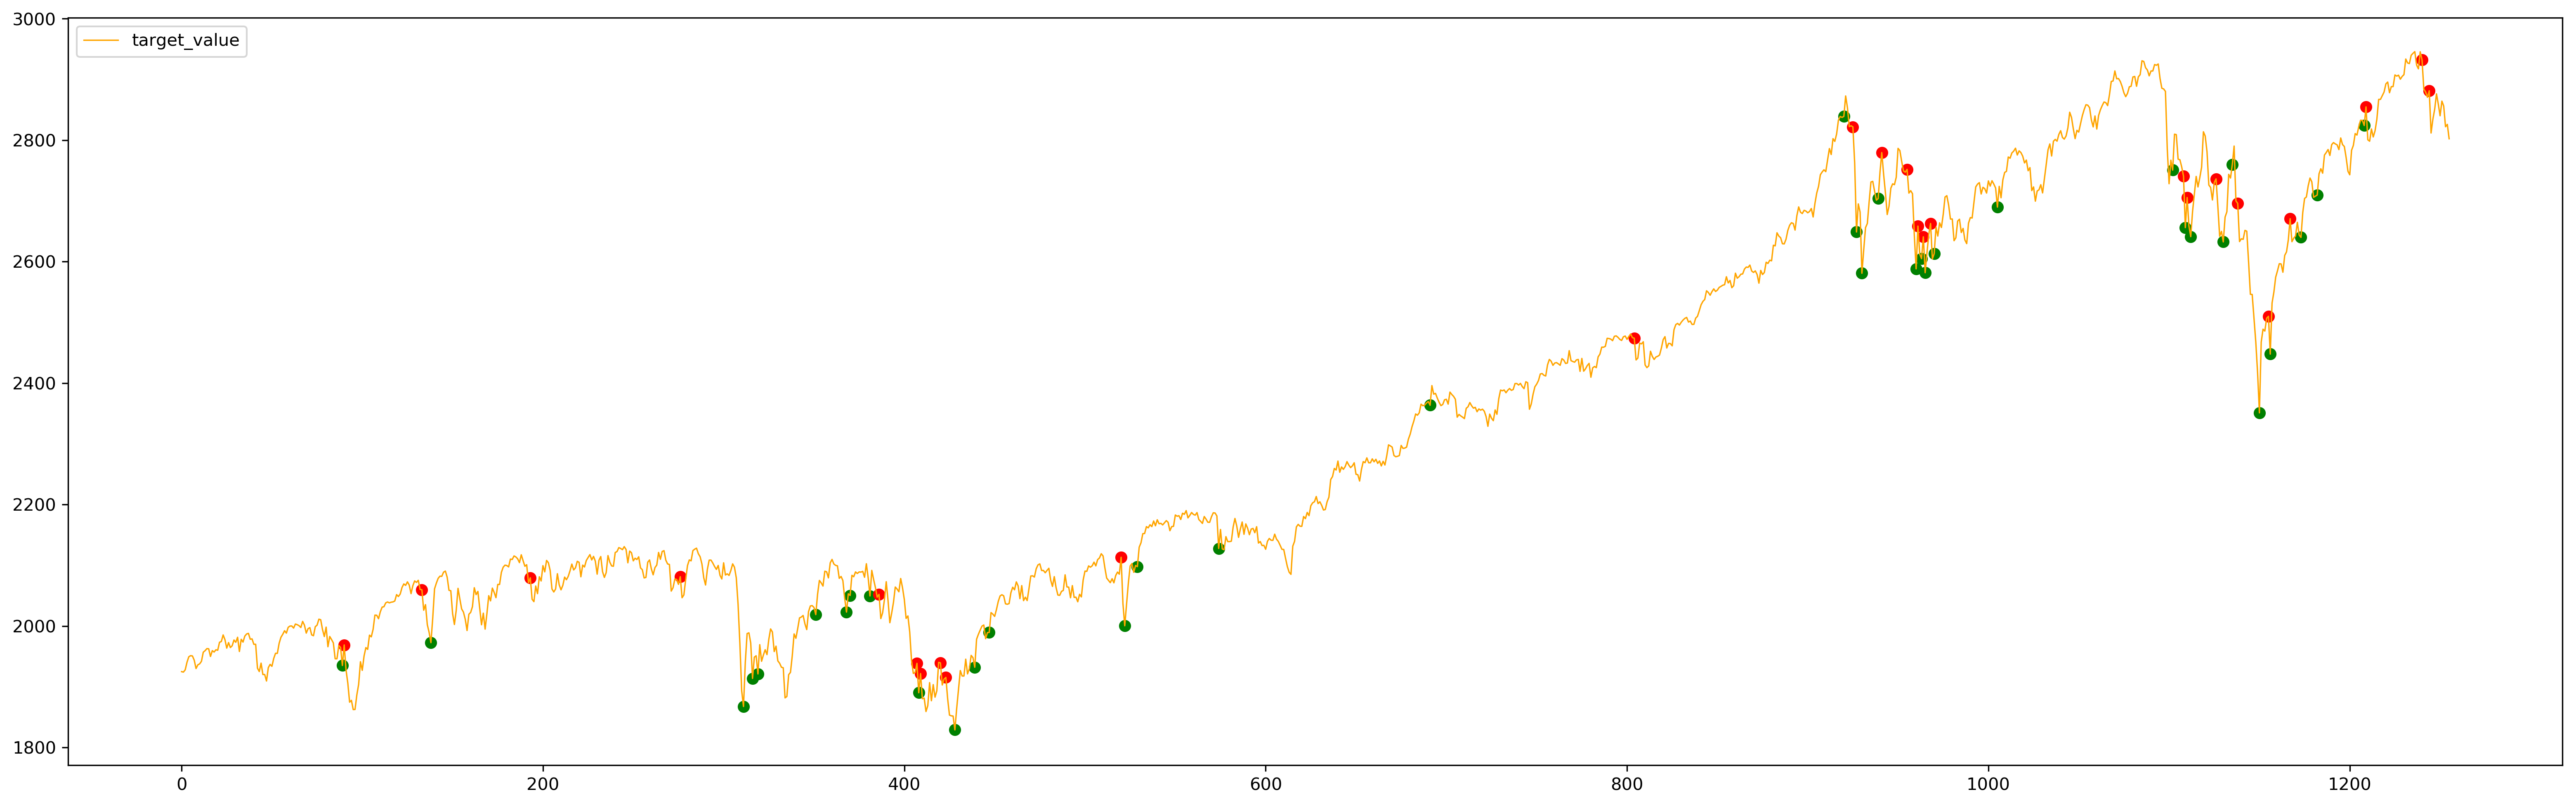

In [1797]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(dataset_1D['target_value'],color='orange',lw=0.8)
for i in range(0,len(dataset_1D)):
    if dataset_1D.iloc[i,-3] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='g',marker='o')
    elif dataset_1D.iloc[i,-2] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='r',marker='o')
plt.legend()

In [1798]:
dataset_1D.to_csv('20190526 data prepared.csv')